<a href="https://colab.research.google.com/github/mostlydipo/Tensorflow-Projects--Advanced/blob/main/Cat_dog_image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import scipy

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
# Set the rescale factor to 1/235
rescale=1/235

# Create three ImageDataGenerator objects with the rescale factor
train_image_generator = ImageDataGenerator(rescale=rescale)
validation_image_generator = ImageDataGenerator(rescale=rescale)
test_image_generator = ImageDataGenerator(rescale=rescale)

# Generate the training data using the train_image_generator
train_data_gen =  train_image_generator.flow_from_directory(
    # Specify the batch size
    batch_size=batch_size,
    # Specify the directory where the training images are located
    directory=train_dir,
    # Resize the images to (IMG_HEIGHT, IMG_WIDTH)
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    # Return the target data as binary arrays
    class_mode='binary')

# Generate the validation data using the validation_image_generator
val_data_gen =  validation_image_generator.flow_from_directory(
    # Specify the batch size
    batch_size=batch_size,
    # Specify the directory where the validation images are located
    directory=validation_dir,
    # Resize the images to (IMG_HEIGHT, IMG_WIDTH)
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    # Return the target data as binary arrays
    class_mode='binary')

# Generate the test data using the test_image_generator
test_data_gen =  test_image_generator.flow_from_directory(
    # Specify the batch size
    batch_size=batch_size,
    # Specify that there are no subdirectories in the target directory
    classes=["."],
    # Specify the directory where the test images are located
    directory=test_dir,
    # Resize the images to (IMG_HEIGHT, IMG_WIDTH)
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    # Do not shuffle the images
    shuffle=False,
    # Return the target data as binary arrays
    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


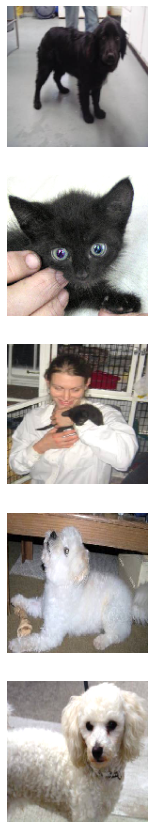

In [ ]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
train_image_generator = ImageDataGenerator(
# Rescale the pixel values by the factor of rescale
rescale=rescale,
# Allow random horizontal flipping of the images
horizontal_flip=True,
# Allow random rotation of the images within a range of 20 degrees
rotation_range=20,
# Allow random zoom in and zoom out of the images within a range of 0.15
zoom_range=0.15,
# Allow random width shift of the images within a range of 0.2
width_shift_range=0.2,
# Allow random height shift of the images within a range of 0.2
height_shift_range=0.2,
# Allow random shearing of the images within a range of 0.15
shear_range=0.15,
# Fill in any newly created pixels after the augmentations using the nearest pixels
fill_mode="nearest"
)


Found 2000 images belonging to 2 classes.


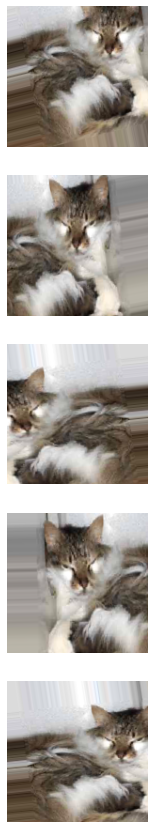

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# create the model using the Sequential API
model = Sequential([
    # Add the first layer, an Input layer with shape (IMG_HEIGHT, IMG_WIDTH, 3)
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    
    # Add a 2D Convolutional layer with 16 filters and a kernel size of 3
    Conv2D(16, 3, padding='same', activation='relu'),
    
    # Add a Max Pooling layer
    MaxPooling2D(),
    
    # Add another 2D Convolutional layer with 32 filters and a kernel size of 3
    Conv2D(32, 3, padding='same', activation='relu'),
    
    # Add another Max Pooling layer
    MaxPooling2D(),
    
    # Add another 2D Convolutional layer with 64 filters and a kernel size of 3
    Conv2D(64, 3, padding='same', activation='relu'),
    
    # Add another Max Pooling layer
    MaxPooling2D(),
    
    # Add a Dropout layer with a rate of 0.2
    Dropout(0.2),
    
    # Flatten the output of the previous layer to prepare for the dense layer
    Flatten(),
    
    # Add a dense layer with 128 units and ReLU activation function
    Dense(128, activation='relu'),
    
    # Add the final layer, a dense layer with 2 units
    Dense(2)
])

# Compile the model
model.compile(
    # Use the Adam optimizer
    optimizer='adam',
    
    # Use Sparse Categorical Crossentropy loss with logits as the loss function
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    
    # Use accuracy as the metric
    metrics=['accuracy'],
)

# Print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
from math import ceil
steps_per_epoch=ceil(len(train_data_gen) / batch_size)
steps_per_epoch

1

In [ ]:
validation_steps = ceil(len(val_data_gen) / batch_size)
validation_steps

1

In [ ]:
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
)

Epoch 1/15
16/16 [==============================] - 94s 6s/step - loss: 0.7370 - accuracy: 0.5005 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 86s 5s/step - loss: 0.6916 - accuracy: 0.5065 - val_loss: 0.6804 - val_accuracy: 0.5880
Epoch 3/15
16/16 [==============================] - 93s 6s/step - loss: 0.6778 - accuracy: 0.5845 - val_loss: 0.6736 - val_accuracy: 0.5650
Epoch 4/15
16/16 [==============================] - 77s 5s/step - loss: 0.6639 - accuracy: 0.6030 - val_loss: 0.6409 - val_accuracy: 0.5940
Epoch 5/15
16/16 [==============================] - 87s 5s/step - loss: 0.6415 - accuracy: 0.6370 - val_loss: 0.6067 - val_accuracy: 0.6640
Epoch 6/15
16/16 [==============================] - 86s 5s/step - loss: 0.6199 - accuracy: 0.6525 - val_loss: 0.5838 - val_accuracy: 0.6750
Epoch 7/15
16/16 [==============================] - 87s 5s/step - loss: 0.6189 - accuracy: 0.6720 - val_loss: 0.5862 - val_accuracy: 0.6730
Epoch 8/15
16/16 [==

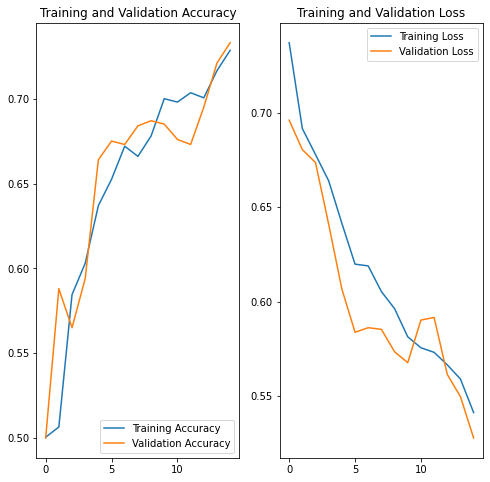

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict(test_data_gen)
probabilities = [1 if a[0]<a[1] else 0 for a in predictions]
# probabilities

1/1 [==============================] - 1s 728ms/step


In [ ]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 82.0% of the images of cats and dogs.
You passed the challenge!
